In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import anderson

In [16]:
ABt = pd.read_csv("concert_pics.csv") 
ABt.head()

,recipient,pic_seen,site_duration,spend,register
0,1,Chili_Peppers,18.2,16.6,1
1,2,Foo,21.2,15.3,0
2,3,Billie,10.9,11.5,1
3,4,Billie,11.3,17.8,0
4,5,Chili_Peppers,19.7,17.3,0


In [25]:
ABt.isnull()


,recipient,pic_seen,site_duration,spend,register
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3395,False,False,False,False,False
3396,False,False,False,False,False
3397,False,False,False,False,False
3398,False,False,False,False,False


In [7]:

overview = ABt.groupby("pic_seen").mean()
overview

,recipient,site_duration,spend,register
pic_seen,,,,
Billie,1734.473730,10.975394,13.786778,0.416813
Chili_Peppers,1693.945946,22.949189,16.781892,0.311712
Foo,1673.040941,16.884059,14.016289,0.341463


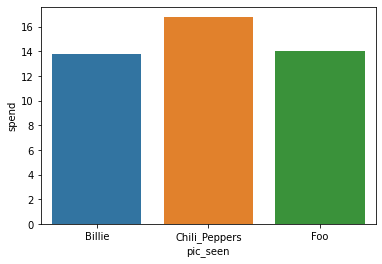

In [10]:
sns.barplot(data=overview,x = overview.index, y = 'spend')

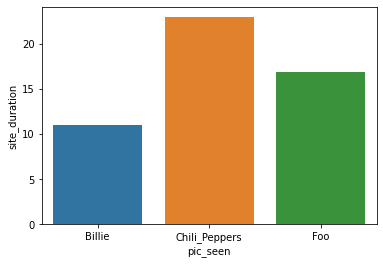

In [11]:
sns.barplot(data=overview,x = overview.index, y = 'site_duration')

In [36]:
p1s=ABt.loc[ABt['pic_seen']=='Billie']['spend']
p2s=ABt.loc[ABt['pic_seen']=='Chili_Peppers']['spend']
p3s=ABt.loc[ABt['pic_seen']=='Foo']['spend']
p1d=ABt.loc[ABt['pic_seen']=='Billie']['site_duration']
p2d=ABt.loc[ABt['pic_seen']=='Chili_Peppers']['site_duration']
p3d=ABt.loc[ABt['pic_seen']=='Foo']['site_duration']

In [37]:
#spend 
import scipy.stats as stats
(tstat, p_value)= stats.ttest_ind(p1s,p2s, equal_var=False)
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -39.15936
The p-value is:  0.0


In [38]:

(tstat, p_value)= stats.ttest_ind(p1d,p3s, equal_var=False)
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -47.4005
The p-value is:  0.0


In [ ]:
#duration

In [39]:
(tstat, p_value)= stats.ttest_ind(p1d,p2d, equal_var=False)
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -178.43526
The p-value is:  0.0


In [40]:
(tstat, p_value)= stats.ttest_ind(p1d,p3d, equal_var=False)
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -49.86967
The p-value is:  0.0



#T test
With graph 1 and graph 2, inference can be made that Chilli_pepers is best choice because it has higher mean of spend and site duration. T test is run for each group.
 H0: mean of group1 = mean of group 2
 H1: mean of two gourp is not euqal
Because all of 4 test cores have p value 0 which result rejection of null hypothesis in any alpha level. Therefore, Chilli paper has significantly higher mean of spend and duration. Therefore, Chilli paper is best choice.


In [11]:
#################prediction
from datetime import date
from datetime import timedelta
For = pd.read_csv("yearlyNI.csv",index_col='date',parse_dates=True) 
For.head()

,Net income
date,
2009-01-01,-60
2010-01-01,-228
2011-01-01,-83
2012-01-01,-163
2013-01-01,-44


In [12]:
For.info

<bound method DataFrame.info of             Net income
date                  
2009-01-01         -60
2010-01-01        -228
2011-01-01         -83
2012-01-01        -163
2013-01-01         -44
2014-01-01         -96
2015-01-01         -66
2016-01-01         -47
2017-01-01          -6
2018-01-01          60
2019-01-01          70
2020-01-01       -1725
2021-01-01        -651>

#
Recent two years are largely influenced by corona virus. Next year may less affected by corona virus since corona virus policy is less stric within whole U.S.. Therefore, I want use weighted average method to reduce 2021 and 2020's inflence to the prediction. Addtionaly, recent years except 2021 and 2020, should has more weight than earlier data. 

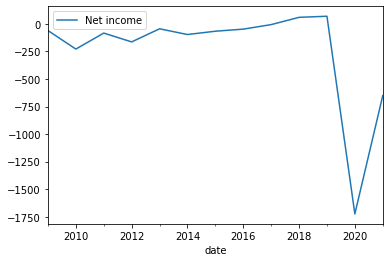

In [20]:

from matplotlib import pyplot
For.plot()
pyplot.show()

With weight shown below to each year from 2010 to 2021. We expect 2022 has Net income as -68.74 million

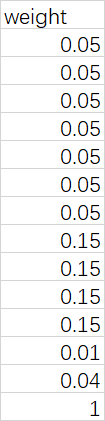

https://www.macrotrends.net/stocks/charts/LYV/live-nation-entertainment/net-income